In [7]:
from hybridpy.learning import dynamicprogramming, ensemblepredictor
from hybridpy.dataset import triploader
from hybridpy.models import batteries, vehicles
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob
import math
sns.set_style('whitegrid')

In [8]:
%matplotlib inline

In [36]:
# Supercapacitor - battery setup for all-electric vehicle
# Cost is current squared on the battery, integrated over time
# Control is battery power,
cc_cf = lambda current, supercap_power, duration_s: (current**2)*duration_s 
bat_controls = [0, 5000, 10000, 20000, 30000, 75000]
supercap = batteries.IdealBattery(max_energy_wh=100)
vehicle = vehicles.ElectricCar(battery=batteries.QuadraticBattery())

In [37]:
dname = '/Users/astyler/projects/ChargeCarData/illah/'
trips = []
fnames = glob.glob(dname+'*.csv')
for fname in fnames:
    trips.append(triploader.load(fname))
    
len(trips)

KeyboardInterrupt: 

In [ ]:
v, q, p, d = dynamicprogramming.compute(trip=trips[0], controls=bat_controls, battery=supercap, vehicle=vehicle, cost_function=cc_cf, soc_states=50)

In [24]:
for i, trip in enumerate(trips[0:2]):
    v, q, p,d  = dynamicprogramming.compute(trip=trip, controls=bat_controls, battery=supercap, vehicle=vehicle, cost_function=cc_cf, soc_states=50)
    with open('pickles/v%03d.pickle' % i, 'wb') as f:
        pickle.dump(v, f)

KeyboardInterrupt: 

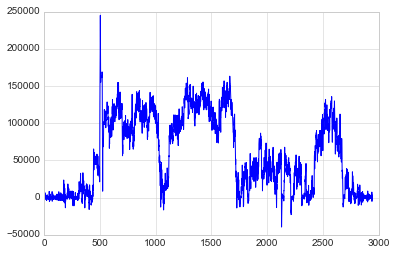

In [35]:
plt.plot(p)

In [32]:
with open('pickles/v001.pickle', 'r') as f:
    v = pickle.load(f)

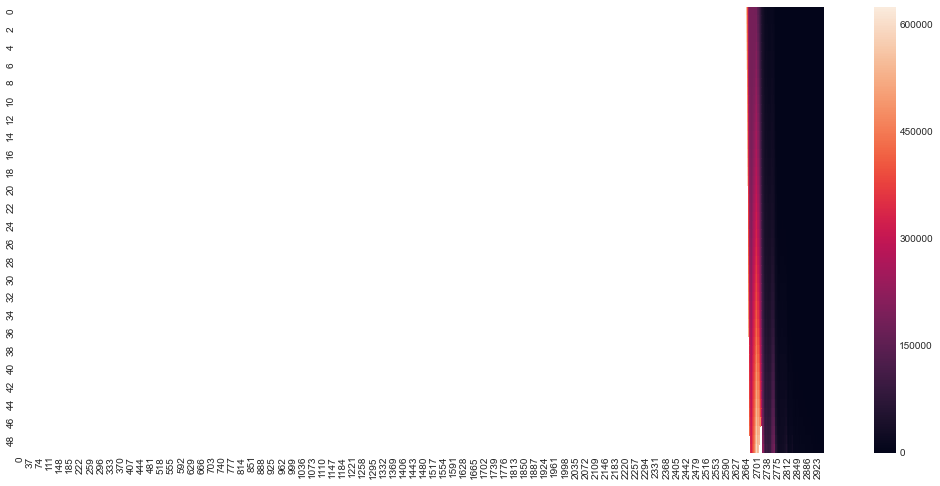

In [33]:
plt.figure(figsize=(18,8))
sns.heatmap(v.T[::-1], linewidths=0)#.imshow(v.T[::-1])#cmap='RdBu_r')

In [33]:
ice_controls = [0, 20000, 40000, 60000, 80000]
ice_cf = lambda control, battery_power, duration_s: control * duration
battery = batteries.QuadraticBattery()

In [11]:
x = [1,2,3,4,5]

In [12]:
y = [10,20,30,np.nan, 50]

In [13]:
from scipy.interpolate import interp1d
f = interp1d(x,y, assume_sorted=True)

In [30]:
t=np.random.rand(*v.shape)

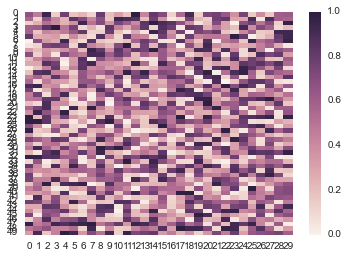

In [34]:
sns.heatmap(np.random.rand(50,30),linewidths=0)

In [16]:
((40000.0/3600)/50.)*100

22.22222222222222